<a href="https://colab.research.google.com/github/dhyeyyyyyyyy/Machine-Learning/blob/main/MI%20P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few records of the dataset:
      X      Y
0  108  392.5
1   19   46.2
2   13   15.7
3  124  422.2
4   40  119.4

Model Performance Metrics:
Mean Absolute Error (MAE): 29.72
Mean Squared Error (MSE): 1395.75
R-squared (R²) Score: 0.18


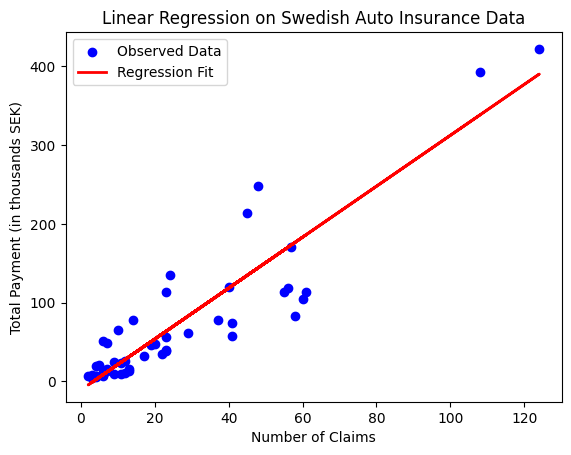


Estimated total payment for 50 claims: 150.80 thousand SEK


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset (Swedish Auto Insurance)
file_path = "/content/sweden-insurance.csv"
df = pd.read_csv(file_path)

# Display dataset preview
print("First few records of the dataset:\n", df.head())

# Define input (number of claims) and output (total payment)
features = df[['X']]  # Independent variable
target = df[['Y']]    # Dependent variable

# Split the dataset into training and test subsets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Generate predictions using the test set
Y_predicted = regressor.predict(X_test)

# Evaluate the model's performance
print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(Y_test, Y_predicted):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(Y_test, Y_predicted):.2f}")
print(f"R-squared (R²) Score: {r2_score(Y_test, Y_predicted):.2f}")

# Plot the data points and the regression line
plt.scatter(features, target, color='blue', label='Observed Data')
plt.plot(features, regressor.predict(features), color='red', linewidth=2, label='Regression Fit')
plt.xlabel("Number of Claims")
plt.ylabel("Total Payment (in thousands SEK)")
plt.title("Linear Regression on Swedish Auto Insurance Data")
plt.legend()
plt.show()

# Function to estimate total payment based on given claims
def estimate_payment(claim_count):
    claim_count = np.array(claim_count).reshape(-1, 1)
    estimated_value = regressor.predict(claim_count)
    return estimated_value

# Example: Predict total payment for 50 claims
sample_claims = 50
estimated_payment = estimate_payment([sample_claims])
print(f"\nEstimated total payment for {sample_claims} claims: {estimated_payment[0][0]:.2f} thousand SEK")
